#### Практика

In [77]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли
from sklearn.ensemble import RandomForestClassifier


plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [78]:
# чтение таблицы и ознакомление
shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [79]:
# размер таблицы
print(shoppers_data.shape)

(12330, 18)


In [80]:
# проверка на пропуски
print(shoppers_data.isna().sum())
print('-' * 40)
print('Пропуски отсутствуют')

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
----------------------------------------
Пропуски отсутствуют


Производим горячую кодировку категориальных признаков

In [81]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [83]:
dummy_data['Revenue'].unique()

array([False,  True])

Целевой признак Revenue является бинарным, значит мы решаем задачу бинарной классификации

Производим анализ соотношения классов

C:\Users\dmitr\AppData\Local\Temp/ipykernel_10068/3161949136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Revenue', data=dummy_data, palette='CMRmap')


Session without purchase: 84.53
Session with purchase: 15.47


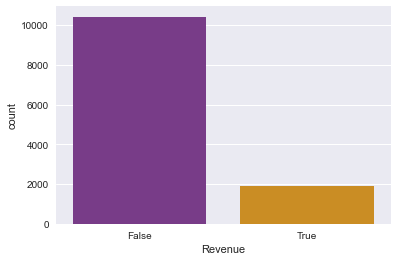

In [84]:
sns.countplot(x = 'Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print(f'Session without purchase: {class_percent[0]:.2f}')
print(f'Session with purchase: {class_percent[1]:.2f}')

Из 12 330 сессий покупкой товара завершаются лишь 15.47 %

Лучшей будет считаться та модель, у которой значение метрики $F1$ для пользователей, совершивших покупку, будет наибольшим.

In [85]:
# разделим набор данных на матрицу наблюдений X и вектор ответов y
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

Разделим выборку на тренировочную и тестовую.
Будем проводить кросс-валидацию на тренировочной выборке (то есть будем делить её на тренировочные и валидационные фолды и считать среднее значение метрики по фолдам)
<br>Итого мы будем использовать три показателя:

- значение метрики на тренировочных и валидационных фолдах кросс-валидации (по ним мы будем отслеживать переобучение модели и подбирать внешние параметры);
- значение метрики на отложенной тестовой выборке (оно будет нашим контрольным показателем)

In [86]:
# Разобъем датасет на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (9864, 28)
Test shape: (2466, 28)


In [ ]:
# Для решения задачи используем Random Forest
#Создаем модель деревья решений
model = ensemble.RandomForestClassifier(random_state=42)

#Создаем объект кросс-валидаттор K-FOLD
kf = model_selection.KFold(n_splits=5)

#Подсчитываем метрики кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений Х
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчет метрики на тренировочных фолдах
)

In [88]:
display(cv_metrics) # показываем метрику на всех пяти фолдах

{'fit_time': array([2.64591837, 2.14830279, 2.22860384, 2.37203836, 2.25458932]),
 'score_time': array([0.08377767, 0.07380342, 0.11421394, 0.0787704 , 0.09973264]),
 'test_score': array([0.67804878, 0.72177419, 0.6251768 , 0.60710195, 0.60722892]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [89]:
# подсчитаем среднее значение F1-score на выборках
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


Так как среднее значение F1-score на валидационных фолдах значительно ниже, чем на тренировочных, можно с уверенностью сказать, что модель является переобученной.

С помощью вариаций Random Forest и с помощью кривых обучения будем выбираь лучшую модель.
<br>Создадим список из трех моделей Random Forest глубиной 5, 7 и 12

In [90]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

In [101]:
#Создаём список из моделей
models = [
    ensemble.RandomForestClassifier(random_state=42, max_depth=5),
    ensemble.RandomForestClassifier(random_state=42, max_depth=7),
    ensemble.RandomForestClassifier(random_state=42, max_depth=12)
]

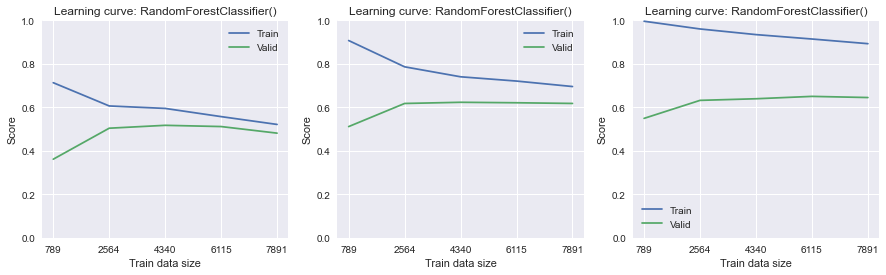

In [103]:
#Внутри цикла будем вызывать нашу функцию plot_learning_curve()
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X_train, y_train, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)

Модель Random Forest с глубиной 7 показала наилучший результат

Произведем обучение модели Random Forest с оптимальной глубаной - 7 и сделаем предсказание.
<br>Выведем отчет о метриках классификации

In [105]:
#Создаем модель деревья решений
model = ensemble.RandomForestClassifier(
    n_estimators=200, 
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

#Обучаем модель на тренирововчной выборке
model.fit(X_train, y_train)

#Деалем предсказания для тренировочной выборок
#y_train_pred = model_opt.predict(X_train)
y_test_pred = model.predict(X_test)

#Выводим значения метрик    
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



#### Повысим качество процесса распознования посетителей, совершивших покупку.
- Используем метод подбора порога вероятности с помощью PR-кривой.
- Порог вероятности будем подбирать с помощью крос валидации на 5 фолдах методом 
- Для кросс-валидации будем использовать Random Forest с глубиной 7

In [106]:
#Создаём модель
model = ensemble.RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)

#делаем предсказание ВЕРОЯТНОСТЕй (proba) на кросс-валидации
y_cv_pred_proba = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
print(y_cv_pred_proba)

[[0.67751554 0.32248446]
 [0.96913055 0.03086945]
 [0.97981615 0.02018385]
 ...
 [0.98993487 0.01006513]
 [0.47892495 0.52107505]
 [0.30235619 0.69764381]]


In [107]:
#выделяем столбец с вероятностями для класса 1
y_cv_pred_proba = y_cv_pred_proba[:, 1]
y_cv_pred_proba

array([0.32248446, 0.03086945, 0.02018385, ..., 0.01006513, 0.52107505,
       0.69764381])

In [108]:
# вычислим координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_pred_proba)
print('Thresholds', thresholds[:5])#выведем первые пять значений для примера, всего значений 94
print('Precision', precision[:5])
print('Recall', recall[:5])

Thresholds [0.0016146  0.00183509 0.00191163 0.00191452 0.00194508]
Precision [0.15470397 0.15471966 0.15473535 0.15475104 0.15476673]
Recall [1. 1. 1. 1. 1.]


In [109]:
#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall) #вернем 94 значения f1_score и передадим ее в функцию

#определим индекс максимума
idx = np.argmax(f1_scores) # из получившегося массива значений вернем индекс максимальноq f1-score (8147) и вернем тресхолд по этому индексу
# мы определили порог вероятности-тресхолд при максимальной f1-score
print(f'idx = {idx}')
print(f'Best threshold = {thresholds[idx]:.2f}, F1-Score = {f1_scores[idx]:.2f}') # возвращаем значения с индексом 8147

idx = 8177
Best threshold = 0.36, F1-Score = 0.69


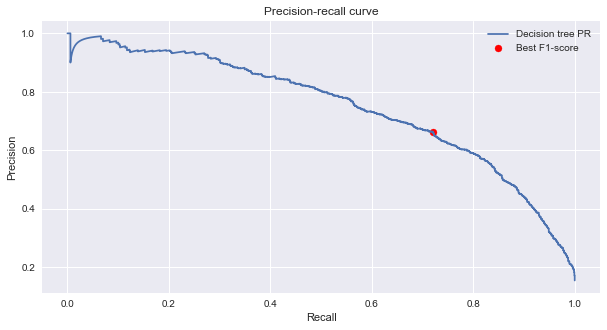

In [110]:
# Строим PR-curve
fig, ax = plt.subplots(figsize=(10, 5)) # фигура и координатная плоскость
ax.plot(recall, precision, label='Decision tree PR') # строим линейный график зависимости precision от recall
ax.scatter(recall[idx], precision[idx], marker='o', color='red', label='Best F1-score') #Отмечаем точку максимума F1-score
# Подписываем график и оси
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#отображаем легенду
ax.legend();

Произведем предсказание классов объекта с оптимальным порогом вероятности 0,36

In [112]:
# Задаем оптимальный порог вероятности
treshold_opt = 0.36

#Покупатели, для которых вероятность сделать покупку > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_proba > treshold_opt).astype('int')
#Возвращаем метрики
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466



In [100]:
thresholds[8147]

0.3559628615243319